![pokemon-logo](https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/International_Pok%C3%A9mon_logo.svg/1200px-International_Pok%C3%A9mon_logo.svg.png)

*[<p style="text-align: center;">All rights reserved to the Pokemon Company</p>](https://pokemon.com)*

# Pokemon Battle Outcome Predictor

Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction import FeatureHasher

from sklearn.metrics import accuracy_score

Importing different classifiers

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Loading the datasets

In [3]:
pokemon = pd.read_csv("pokemon.csv")
combats = pd.read_csv("combats.csv")

In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


## Data Visualization

### Number of pokemon in each type

In [6]:
x_labels = dict(pokemon["Type 1"].value_counts()).keys()
y_axis_1 = dict(pokemon["Type 1"].value_counts()).values()
y_axis_2 = dict(pokemon["Type 2"].value_counts()).values()

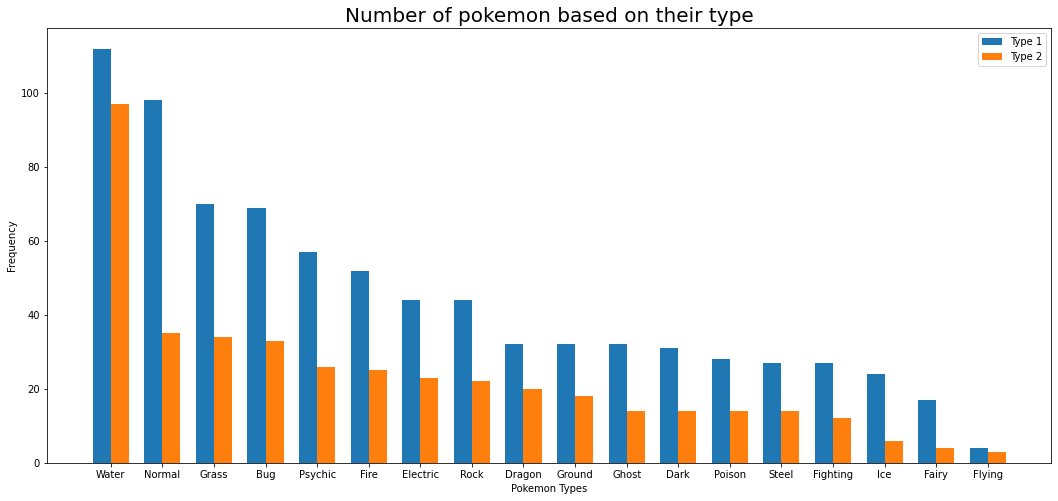

In [7]:
x_axis = np.arange(len(x_labels))

fig = plt.figure(figsize=[18, 8])

plt.bar(x_axis - 0.175, y_axis_1, width = 0.350, label = 'Type 1')
plt.bar(x_axis + 0.175, y_axis_2, width = 0.350, label = 'Type 2')

plt.xticks(x_axis, x_labels)

plt.xlabel("Pokemon Types")
plt.ylabel("Frequency")
plt.title("Number of pokemon based on their type", fontsize = 20)

plt.legend()

plt.show()

### Number of pokemon present in each generation.

In [8]:
generation =  dict(pokemon['Generation'].value_counts())

generation = dict(sorted(generation.items()))

gen_counts = generation.values() # No of pokemon in each generation
gen = generation.keys()  # Type of generation

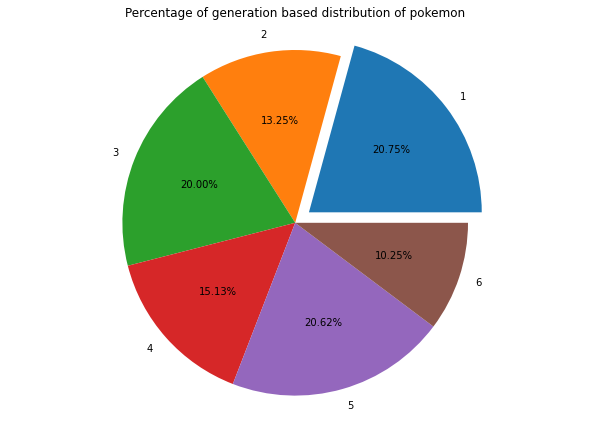

In [9]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle("Percentage of generation based distribution of pokemon", y = 1)

ax = fig.add_axes([0,0,1,1])

explode = (0.1, 0.0, 0, 0, 0, 0)  # explode 1st slice
ax.axis('equal')
plt.pie(gen_counts, labels = gen,autopct='%1.2f%%', shadow=False, explode=explode)

plt.show()

## Data Preprocessing

#### Checking for `null` data in columns

In [10]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


We find out that there is 1 `null` value in `Name` column.
Upon further investigations we find out that the pokemon with `null` name in 'Primape'

In [11]:
pokemon['Name'] = pokemon['Name'].fillna('Primeape')

#### Handle Missing Data

In [12]:
pokemon["Type 2"] = pokemon["Type 2"].fillna("NA")

#### Categorical Data to numerical value

In [13]:
pokemon["Legendary"] = pokemon["Legendary"].astype(int)

In [14]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    int32 
dtypes: int32(1), int64(8), object(3)
memory usage: 72.0+ KB


Converting `Type 1` and `Type 2` columns to numerical data for easier processing

In [15]:
h1 = FeatureHasher(n_features=5, input_type='string')
h2 = FeatureHasher(n_features=5, input_type='string')
d1 = h1.fit_transform(pokemon["Type 1"])
d2 = h2.fit_transform(pokemon["Type 2"])

# Convert to dataframe

d1 = pd.DataFrame(data=d1.toarray())
d2 = pd.DataFrame(data=d2.toarray())

# Drop Type 1 and Type 2 column from Pokemon dataset and concatenate the above two dataframes.

pokemon = pokemon.drop(columns = ["Type 1", "Type 2"])
pokemon = pd.concat([pokemon, d1, d2], axis=1)

In [16]:
pokemon

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,0,1,2,3,4,0,1,2,3,4
0,1,Bulbasaur,45,49,49,65,65,45,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
1,2,Ivysaur,60,62,63,80,80,60,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
2,3,Venusaur,80,82,83,100,100,80,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
3,4,Mega Venusaur,80,100,123,122,120,80,1,0,2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,2.0,-2.0
4,5,Charmander,39,52,43,60,50,65,1,0,1.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,50,100,150,100,150,50,6,1,0.0,-1.0,-1.0,1.0,1.0,2.0,-1.0,0.0,-1.0,1.0
796,797,Mega Diancie,50,160,110,160,110,110,6,1,0.0,-1.0,-1.0,1.0,1.0,2.0,-1.0,0.0,-1.0,1.0
797,798,Hoopa Confined,80,110,60,150,130,70,6,1,-1.0,-2.0,-2.0,0.0,0.0,-1.0,0.0,0.0,1.0,-1.0
798,799,Hoopa Unbound,80,160,60,170,130,80,6,1,-1.0,-2.0,-2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


Converting the current dataset into a new dataset with following format:
`(pokemon_1_data, pokemon_2_data, winner)`

In [17]:
data = []
for t in combats.itertuples():
    first_pokemon = t[1]
    second_pokemon = t[2]
    winner = t[3]
    
    x = pokemon.loc[pokemon["#"]==first_pokemon].values[:, 2:][0]
    y = pokemon.loc[pokemon["#"]==second_pokemon].values[:, 2:][0]
    diff = (x-y)[:6]
    z = np.concatenate((x,y))
    
    if winner == first_pokemon:
        z = np.append(z, [0])
    else:
        z = np.append(z, [1])
        
    data.append(z)

Convert list to numpy array

In [18]:
data = np.asarray(data)

In [19]:
X = data[:, :-1].astype(int) # Input features
y = data[:, -1].astype(int) # Output label (Winner column)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Different Classification models

### Random Forest Classifier

In [21]:
rfc = RandomForestClassifier(n_estimators=200, n_jobs= 6)
rfc_model = rfc.fit(X_train, y_train)


In [22]:
rfc_pred = rfc_model.predict(X_test)

In [23]:
print('Accuracy :', accuracy_score(rfc_pred, y_test))

Accuracy : 0.94888


### Descision Tree Classifier

In [24]:
dtree = DecisionTreeClassifier()
dtree_model = dtree.fit(X_train, y_train)


In [25]:
dtree_pred = dtree_model.predict(X_test)

In [26]:
print('Accuracy :', accuracy_score(dtree_pred, y_test))

Accuracy : 0.9384


### K-Nearest Neighbor

In [27]:
knn = KNeighborsClassifier(n_jobs = 6)
knn_model = knn.fit(X_train, y_train)


In [28]:
knn_pred = knn_model.predict(X_test)

In [29]:
print('Accuracy :', accuracy_score(knn_pred, y_test))

Accuracy : 0.87576


## Working with Random Forest Classification

As we can see, Random Forest Classifier gives the best accuracy among the three classifiers. We can further tweak the accuracy by trying out different values of `n_estimators`. Since we do not know the optimal value of `n_estimators`, we run a loop from 1 to 600 and make a graph of it in order to obtain the highest accuracy possible.

In [30]:
import time

scores = []
time_taken = []

for k in range(50, 601, 50):
    trfc = RandomForestClassifier(n_estimators=k, n_jobs = 6)

    start = time.process_time()

    trfc.fit(X_train, y_train)

    elapsed = (time.process_time() - start)

    y_pred = trfc.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))
    time_taken.append(elapsed)

print(scores)
print(time_taken)

50 52.34375
100 112.78125
150 153.90625
200 211.125
250 258.90625
300 306.1875
350 358.609375
400 415.8125
450 437.796875
500 494.640625
550 498.171875
600 541.875
[0.944, 0.94608, 0.94808, 0.94744, 0.94872, 0.94912, 0.94952, 0.94848, 0.94872, 0.94976, 0.9476, 0.94944]
[52.34375, 112.78125, 153.90625, 211.125, 258.90625, 306.1875, 358.609375, 415.8125, 437.796875, 494.640625, 498.171875, 541.875]


Plotting a graph to get a visual reperesentation of accuracy relative to `n_estimators`

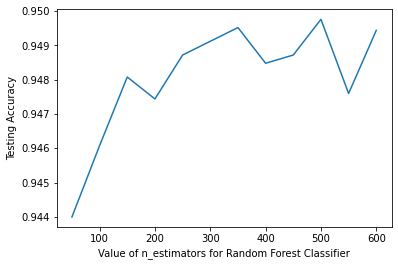

In [31]:
plt.plot(range(50, 601, 50), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')
plt.show()

Plotting a graph to get a visual reperesentation of time taken to train model in seconds relative to `n_estimators`

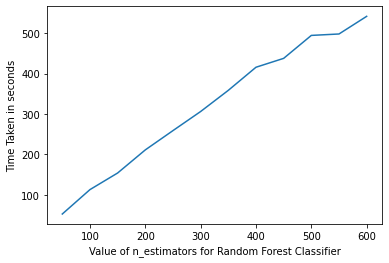

In [32]:
plt.plot(range(50, 601, 50), time_taken)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Time Taken in seconds')
plt.show()

The above two graphs give us a good idea of ... soemthing


In [33]:
rfc = RandomForestClassifier(n_estimators=400, n_jobs= 6)
rfc_model = rfc.fit(X_train, y_train)


In [34]:
rfc_pred = rfc_model.predict(X_test)

In [35]:
print('Accuracy :', accuracy_score(rfc_pred, y_test))

Accuracy : 0.94944
